In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter

In [31]:
body_fat = pd.read_excel("Downloads/BodyFat.xls")
body_fat.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## 1

In [54]:
body_fat.corr()['ADIPOSITY']

IDNO         0.047717
BODYFAT      0.727994
DENSITY     -0.714732
AGE          0.118851
WEIGHT       0.887352
HEIGHT      -0.024891
ADIPOSITY    1.000000
NECK         0.777857
CHEST        0.911799
ABDOMEN      0.923880
HIP          0.883269
THIGH        0.812706
KNEE         0.713660
ANKLE        0.500317
BICEPS       0.746384
FOREARM      0.558594
WRIST        0.625907
Name: ADIPOSITY, dtype: float64

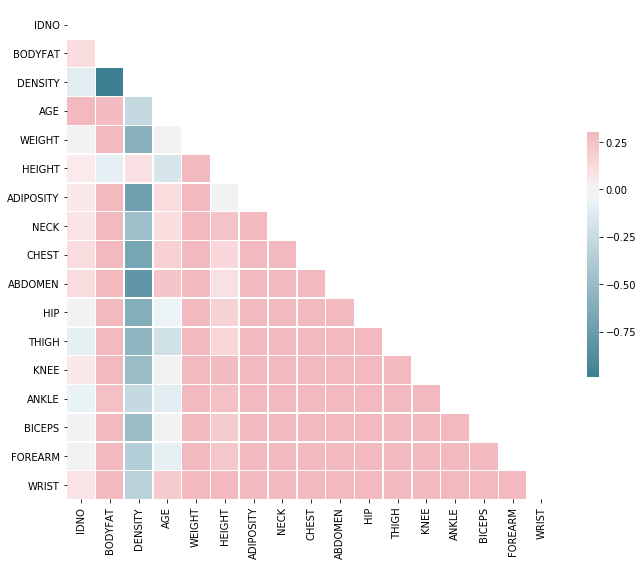

In [57]:
corr = body_fat.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 2

In [79]:
u45 = body_fat[body_fat["AGE"] < 45]
o45 = body_fat[body_fat["AGE"] > 45]
u45_corr = u45.corr()['ADIPOSITY']
o45_corr = o45.corr()['ADIPOSITY']

In [70]:
diff = []
for i in range(body_fat.columns.values.size):
    diff.append(u45_corr[i] - o45_corr[i])
    
char = list(zip(body_fat.columns.values,diff))
char

[('IDNO', 0.033137219482236746),
 ('BODYFAT', -0.040692187895249532),
 ('DENSITY', 0.024284928120028026),
 ('AGE', -0.0052134740592295614),
 ('WEIGHT', 0.014478018001976012),
 ('HEIGHT', 0.031544626605110385),
 ('ADIPOSITY', 0.0),
 ('NECK', -0.021583966360495643),
 ('CHEST', 0.012619525000603482),
 ('ABDOMEN', -0.01621807424836863),
 ('HIP', 0.0020467205491075946),
 ('THIGH', 0.048044213539201297),
 ('KNEE', 0.091372731820232422),
 ('ANKLE', -0.028815715543883902),
 ('BICEPS', 0.091466347934989645),
 ('FOREARM', 0.019042489871869184),
 ('WRIST', 0.084114583770851348)]

## Biggest changes

In [75]:

sorted(char, key=itemgetter(1),reverse=True)

[('BICEPS', 0.091466347934989645),
 ('KNEE', 0.091372731820232422),
 ('WRIST', 0.084114583770851348),
 ('THIGH', 0.048044213539201297),
 ('IDNO', 0.033137219482236746),
 ('HEIGHT', 0.031544626605110385),
 ('DENSITY', 0.024284928120028026),
 ('FOREARM', 0.019042489871869184),
 ('WEIGHT', 0.014478018001976012),
 ('CHEST', 0.012619525000603482),
 ('HIP', 0.0020467205491075946),
 ('ADIPOSITY', 0.0),
 ('AGE', -0.0052134740592295614),
 ('ABDOMEN', -0.01621807424836863),
 ('NECK', -0.021583966360495643),
 ('ANKLE', -0.028815715543883902),
 ('BODYFAT', -0.040692187895249532)]

## -> The characteristic that change the most between under 45 and over over 45 people is BICEPS

## Segment by obesity

In [103]:
obese_20_39 = body_fat[(body_fat["AGE"]>19) & (body_fat["AGE"]<39)][body_fat['ADIPOSITY']>26]
obese_49_59 = body_fat[(body_fat["AGE"]>39) & (body_fat["AGE"]<60)][body_fat['ADIPOSITY']>29]
obese_60_79 = body_fat[(body_fat["AGE"]>59) & (body_fat["AGE"]<80)][body_fat['ADIPOSITY']>31]

/home/antran96/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/antran96/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/antran96/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
